In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'dataset/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1803 files belonging to 21 classes.


In [3]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'dataset/validation/',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 205 files belonging to 21 classes.


In [4]:
cnn = tf.keras.models.Sequential()

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [8]:
cnn.add(tf.keras.layers.Flatten())

In [9]:
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [10]:
cnn.add(tf.keras.layers.Dense(units=21,activation='softmax'))

In [11]:
cnn.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
training_history = cnn.fit(x=training_set,validation_data=test_set,epochs=30)

Epoch 1/30
57/57 [==============================] - 26s 400ms/step - loss: 8.3974 - accuracy: 0.0721 - val_loss: 2.8744 - val_accuracy: 0.0829
Epoch 2/30
57/57 [==============================] - 29s 471ms/step - loss: 4.7056 - accuracy: 0.1115 - val_loss: 2.5308 - val_accuracy: 0.3463
Epoch 3/30
57/57 [==============================] - 28s 452ms/step - loss: 4.0279 - accuracy: 0.1897 - val_loss: 2.1001 - val_accuracy: 0.4780
Epoch 4/30
57/57 [==============================] - 26s 373ms/step - loss: 4.5540 - accuracy: 0.2207 - val_loss: 3.8784 - val_accuracy: 0.2585
Epoch 5/30
57/57 [==============================] - 26s 406ms/step - loss: 3.0901 - accuracy: 0.3428 - val_loss: 1.7704 - val_accuracy: 0.5659
Epoch 6/30
57/57 [==============================] - 24s 371ms/step - loss: 4.0412 - accuracy: 0.3932 - val_loss: 1.3875 - val_accuracy: 0.6976
Epoch 7/30
57/57 [==============================] - 23s 365ms/step - loss: 2.7397 - accuracy: 0.5003 - val_loss: 1.0003 - val_accuracy: 0.7561

In [13]:
cnn.save("Fruits_Vegetables.h5")

In [14]:
import json
with open('training_hist.json', 'w') as f:
    json.dump(training_history.history, f)

In [15]:
training_history.history

{'loss': [8.397404670715332,
  4.705646514892578,
  4.027864456176758,
  4.554038047790527,
  3.0901410579681396,
  4.041219711303711,
  2.7396621704101562,
  2.5376079082489014,
  1.592437982559204,
  1.6351491212844849,
  1.2033692598342896,
  1.139089822769165,
  1.1428042650222778,
  1.1609174013137817,
  1.1479026079177856,
  0.8923599720001221,
  1.0506101846694946,
  0.8438360691070557,
  0.8764954209327698,
  0.6740218997001648,
  1.0126960277557373,
  0.6295762658119202,
  0.7344198822975159,
  0.7826365232467651,
  0.5201123952865601,
  0.5782442092895508,
  0.5934838652610779,
  0.5523135662078857,
  0.6342872381210327,
  0.6054227948188782],
 'accuracy': [0.07210205495357513,
  0.11148086190223694,
  0.18968385457992554,
  0.22074320912361145,
  0.3427620530128479,
  0.3932335078716278,
  0.5002773404121399,
  0.5330005288124084,
  0.622296154499054,
  0.6500277519226074,
  0.7165834903717041,
  0.7149195671081543,
  0.7548530101776123,
  0.7676095366477966,
  0.79423183202

In [16]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [17]:
print('Test set Accuracy: {} %'.format(training_history.history['val_accuracy'][-1]*100))

Test set Accuracy: 96.09755873680115 %


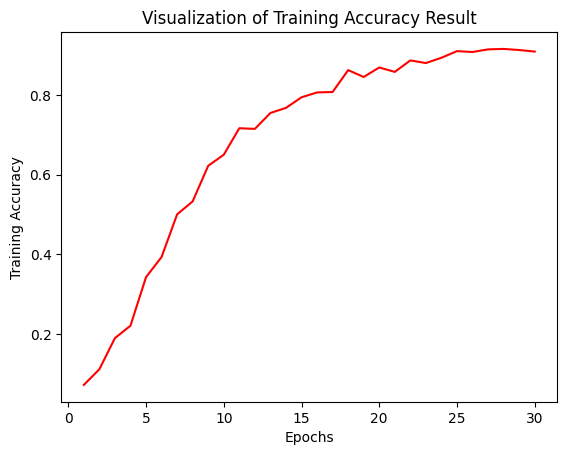

In [18]:
epochs=[i for i in range(1,31)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title("Visualization of Training Accuracy Result")
plt.show()

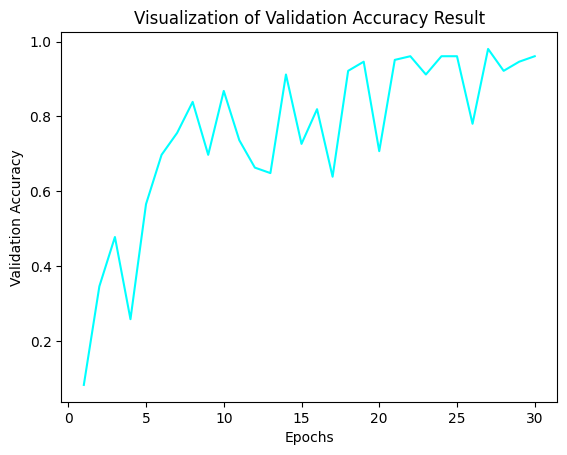

In [19]:
plt.plot(epochs,training_history.history['val_accuracy'],color='cyan')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title("Visualization of Validation Accuracy Result")
plt.show()